## Data Preparation

In the exploration of the dataset, we observed a few issues, which need to be resolved before the dataset is ready for machine learning (ML) such as:

-missing values in  (age, job, education, contact and poutcome).

-negative values in **pdays** column.


-The **other** label in the poutcome column contains ambiguous information.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# will retur the count of missing values nan in each column
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Since a quarter of the **poutcome** labels are missing, it might be better to remove this column to avoid any problems.

In [6]:
df.drop('poutcome', axis=1, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,yes


In [7]:
# a copy of the original data
original_df = df
original_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,yes


### One-Hot Encode All Nominal Attributes

### Nominal attributes represent categories without any inherent order or ranking between them.

#### we will convert categorical variables into binary columns that represent the presence or abscence of each category

In [8]:
# one-hot encoding for the categorical columns with NaNs
df = pd.get_dummies(df, columns=["default", "job", "marital", "housing", "loan", "contact", "month"], dummy_na=True, drop_first=True)

In [9]:
df.head()

,age,education,balance,day,duration,campaign,pdays,previous,subscribed,default_yes,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan
0,32.0,tertiary,392,1,957,2,131,2,no,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,secondary,688,1,233,2,133,1,no,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,secondary,1035,1,126,2,239,1,no,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,secondary,398,1,274,1,238,2,no,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,secondary,1004,1,479,1,307,1,no,0,...,0,0,0,0,0,0,0,0,0,0


### Mapping and Scaling **education** and **subscribed** columns (Ordinal attributes)

### Ordinal attributes also represent categories but have a specific order or ranking associated with them.

In [10]:
scale_mapper_education = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}
scale_mapper_subscribed = {
    "yes": 1,
    "no": 0,
}

df['education'] = df['education'].replace(scale_mapper_education)
df['subscribed'] = df['subscribed'].replace(scale_mapper_subscribed)
df



,age,education,balance,day,duration,campaign,pdays,previous,subscribed,default_yes,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan
0,32.0,3.0,392,1,957,2,131,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,2.0,688,1,233,2,133,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,2.0,1035,1,126,2,239,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,2.0,398,1,274,1,238,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,2.0,1004,1,479,1,307,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,NaN,2785,16,327,2,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1996,28.0,2.0,127,16,1334,2,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1997,81.0,1.0,1154,17,231,1,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,1.0,4343,20,185,1,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
df.isna().sum()

age                   12
education            104
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
default_yes            0
default_nan            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
contact_telephone      0
contact_nan            0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0


### We prefered to use KNN because is often considered useful for predicting missing values, it imputes them based on the similarity to existing data points.

In [15]:
from sklearn.impute import KNNImputer

columns_to_impute = ['age', 'education']

imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
df

,age,education,balance,day,duration,campaign,pdays,previous,subscribed,default_yes,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan
0,32.0,3.0,-0.110187,1,3.094421,2,-0.291013,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,2.0,0.094941,1,-0.012876,2,-0.279601,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,2.0,0.335412,1,-0.472103,2,0.325250,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,2.0,-0.106029,1,0.163090,1,0.319544,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,2.0,0.313929,1,1.042918,1,0.713267,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2.0,1.548164,16,0.390558,2,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1996,28.0,2.0,-0.293832,16,4.712446,2,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1997,81.0,1.0,0.417879,17,-0.021459,1,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,1.0,2.627859,20,-0.218884,1,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df.isna().sum()

age                  0
education            0
balance              0
day                  0
duration             0
campaign             0
pdays                0
previous             0
subscribed           0
default_yes          0
default_nan          0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
marital_married      0
marital_single       0
marital_nan          0
housing_yes          0
housing_nan          0
loan_yes             0
loan_nan             0
contact_telephone    0
contact_nan          0
month_aug            0
month_dec            0
month_feb            0
month_jan            0
month_jul            0
month_jun            0
month_mar            0
month_may            0
month_nov            0
month_oct            0
month_sep            0
month_nan            0
dtype: int6

### As we see now there is no missing value in our dataset

### -RobusteScaler for **balance** column

#### we choose RobustScaler to normalize balance, pdays, duration to reduce the effects of outliers

In [18]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df[['balance', 'pdays', 'duration']] = robust_scaler.fit_transform(df[['balance', 'pdays', 'duration']])
df

,age,education,balance,day,duration,campaign,pdays,previous,subscribed,default_yes,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan
0,32.0,3.0,-0.110187,1,3.094421,2,-0.291013,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,2.0,0.094941,1,-0.012876,2,-0.279601,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,2.0,0.335412,1,-0.472103,2,0.325250,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,2.0,-0.106029,1,0.163090,1,0.319544,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,2.0,0.313929,1,1.042918,1,0.713267,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2.0,1.548164,16,0.390558,2,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1996,28.0,2.0,-0.293832,16,4.712446,2,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1997,81.0,1.0,0.417879,17,-0.021459,1,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,1.0,2.627859,20,-0.218884,1,-1.044223,0,1,0,...,0,0,0,0,0,0,0,0,1,0


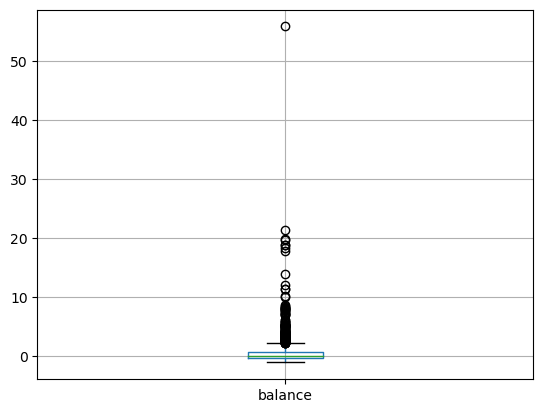

In [19]:
df.boxplot(column="balance")
plt.show()

### We can observe that outliers are now reduced compared to the previous plot, before normalization

## Saving the prepared Dataset

In [20]:
df.to_csv('prepared_dataset_bank.csv')